# Idea: use xgboost to predict, among the sessions that have numeric  reference before clickout, when the clickout coincides with the last reference

In [60]:
import data

In [61]:
import pandas as pd

In [62]:
import numpy as np

In [112]:
from sklearn.metrics import classification_report

In [71]:
import xgboost as xgb

In [95]:
import matplotlib.pyplot as plt

In [103]:
from utils.check_folder import check_folder

In [105]:
import pickle

## Build the dataset

In [63]:
def existsIndex(df, idx):
    try:
        df.loc[idx]
        return True
    except KeyError:
        return False

In [64]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except TypeError:
        return False
    except ValueError:
        return False

In [65]:
df = data.train_df('full')

/home/giovanni/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [66]:
def func(x):
    y = x[x['action_type'] == 'clickout item']
    clk = y.tail()
    if existsIndex(x, clk.index - 1):
        if RepresentsInt(x.loc[clk.index - 1]['reference']):
            num_ref_row = x.loc[clk.index - 1]
            
            # feature computation
            
            # time elapsed
            time_elapsed = int(clk['timestamp']) - int(num_ref_row['timestamp'])
            
            # times clicked num ref on session
            x_num_ref = x[x['reference'] == num_ref_row['reference'].values[0]]
            num_clicked = len(x_num_ref) - 1
            
            # type
            action_type = num_ref_row['action_type'].values[0]
            
            # pos in impressions
            impressions = list(map(int, clk['impressions'].values[0].split('|')))
            pos_in_impressions = np.inf
            if int(num_ref_row['reference']) in impressions:
                pos_in_impressions = impressions.index(int(num_ref_row['reference'])) + 1
                
            label = None
            if clk['reference'].values[0] == num_ref_row['reference'].values[0]:
                label = 1
            else:
                label = 0
            
            return pd.DataFrame({'time_elapsed': [time_elapsed], 'num_clicked': [num_clicked], 'action_type': [action_type], 'position_in_impression': [pos_in_impressions], 'label': [label]})

In [67]:
dataset = df.groupby(['user_id', 'session_id']).apply(func)
one_hot = pd.get_dummies(dataset['action_type'])
dataset = dataset.drop(['action_type'],axis = 1)
dataset = dataset.join(one_hot)

/home/giovanni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/home/giovanni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [119]:
del df

In [141]:
dataset

,,,time_elapsed,num_clicked,position_in_impression,label,interaction item deals,interaction item image,interaction item info,interaction item rating,search for item
user_id,session_id,,,,,,,,,,
000III2Y1FXN,f9eedbf105c5c,0,3,1,1.000000,1,0,1,0,0,0
0012IHLNTQWC,a035e580f0e64,0,231,17,11.000000,0,0,1,0,0,0
0013L641G5P2,543651d2bac03,0,75,0,inf,0,1,0,0,0,0
00180FGBX4P2,b0c0d9a424374,0,13,11,4.000000,1,0,1,0,0,0
001F4FO9P0ED,9d989453160ba,0,26,1,1.000000,1,1,0,0,0,0
001G88F8NP9P,2a2e9eb9c967c,0,7,7,7.000000,0,0,1,0,0,0
001I03QURZH9,be78cb0bac72d,0,17,1,6.000000,1,0,0,0,1,0
001OBEBO5LFE,a776605c278b0,0,5,2,6.000000,1,0,1,0,0,0
001UXWLZZDQG,042a4f6223486,0,7,2,1.000000,1,0,1,0,0,0


In [69]:
X, y = dataset.iloc[:,[0,1,2,4,5,6,7,8]],dataset.iloc[:,3]

## Split the data

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### More or less balanced ;)

In [142]:
sum(y_test.values)/len(y_test)

0.7442277631140609

### Let's balance it more!

In [151]:
df_percent = dataset[dataset['label'] == 1].sample(frac=0.65)

balanced_dataset = dataset.drop(df_percent.index)

In [152]:
balanced_dataset

,,,time_elapsed,num_clicked,position_in_impression,label,interaction item deals,interaction item image,interaction item info,interaction item rating,search for item
user_id,session_id,,,,,,,,,,
0012IHLNTQWC,a035e580f0e64,0,231,17,11.000000,0,0,1,0,0,0
0013L641G5P2,543651d2bac03,0,75,0,inf,0,1,0,0,0,0
00180FGBX4P2,b0c0d9a424374,0,13,11,4.000000,1,0,1,0,0,0
001G88F8NP9P,2a2e9eb9c967c,0,7,7,7.000000,0,0,1,0,0,0
001OBEBO5LFE,a776605c278b0,0,5,2,6.000000,1,0,1,0,0,0
001YQ253U4DR,8081cdc0e7b94,0,11,2,5.000000,1,0,1,0,0,0
0023Q64AC95I,d7b1dcf59884c,0,0,1,5.000000,1,0,1,0,0,0
00280CNY7H6F,54f8a2c8da7aa,0,0,3,1.000000,1,0,1,0,0,0
002IXCPKK20W,dcdc75a82f142,0,56,0,inf,0,0,0,0,0,1


In [153]:
X_balanced, y_balanced = balanced_dataset.iloc[:,[0,1,2,4,5,6,7,8]],balanced_dataset.iloc[:,3]
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=123)

In [154]:
sum(y_balanced_test.values)/len(y_balanced_test)

0.5051730998806208

## Train on it

In [155]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic')#, colsample_bytree = 0.3, learning_rate = 0.1,
                #max_depth = 5, alpha = 10, n_estimators = 10)

In [156]:
xg_reg.fit(X_balanced_train,y_balanced_train)

preds = xg_reg.predict(X_balanced_test)

### Feature importance

([<matplotlib.axis.XTick at 0x7f78497966d8>,
 <a list of 8 Text xticklabel objects>)

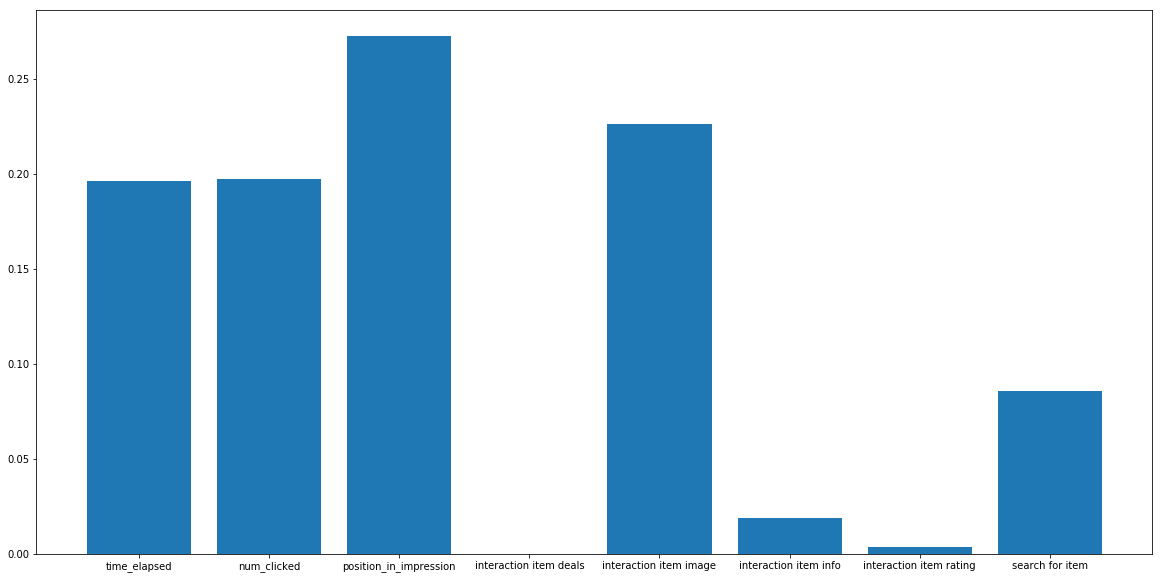

In [157]:
x = np.arange(len(X_train.columns.values))
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, height = xg_reg.feature_importances_) 
plt.xticks(x, X_train.columns.values)

## Training results

In [159]:
target_names = ['clk_diff_ref', 'clk_eq_ref']
print(classification_report(y_balanced_test, preds, target_names=target_names))

              precision    recall  f1-score   support

clk_diff_ref       0.89      0.79      0.84      9948
  clk_eq_ref       0.82      0.90      0.86     10156

   micro avg       0.85      0.85      0.85     20104
   macro avg       0.85      0.85      0.85     20104
weighted avg       0.85      0.85      0.85     20104



In [160]:
accuracy = accuracy_score(y_balanced_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.80%


# Save the model

In [107]:
check_folder('models')
pickle.dump(xg_reg, open("models/xgboost.pickle.dat", "wb"))

In [108]:
loaded_model = pickle.load(open("models/xgboost.pickle.dat", "rb"))

# Read the model back and double check that accuracy is the same

In [110]:
loaded_model.fit(X_train,y_train)

dcpreds = loaded_model.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, dcpreds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.28%
